<a href="https://colab.research.google.com/github/Ellige/Assignment_18/blob/main/Assignment_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de Bibliotecas

In [8]:
import pandas as pd
import numpy as np

In [9]:
#Import dataset

df_heart = pd.read_csv("/content/sample_data/heart.csv")

In [28]:
#Checando colunas
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#Informações do dataset

INFORMAÇÕES DO DATASET:
- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable
defect

In [10]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df_heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
df_heart.describe(percentiles=[0.001, .01, .1, .25, .5, .75, .9, .99, .999])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1%,30.510000,0.000000,0.000000,94.000000,127.510000,0.000000,0.000000,76.134000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,35.000000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
10%,42.000000,0.000000,0.000000,110.000000,188.000000,0.000000,0.000000,116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000


In [15]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
#Checando valores nulos
df_heart.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
#Checando duplicados
print(df_heart.duplicated())
print('Quantidade de duplicados:', df_heart.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool
Quantidade de duplicados: 1


In [25]:
#Dropando duplicados
df_heart = df_heart.drop_duplicates()
print('Quantidade de duplicados:', df_heart.duplicated().sum())

Quantidade de duplicados: 0


In [14]:
#contagem de elementos distintos em cada coluna
df_heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Tipos de variáveis

- Variáveis categóricas: sex, thal e exang
- Variáveis discretas: cp, restecg, ca, slope, fbs 
- Variáveis contínuas: thalach, trestbps, chol, age e oldpeak

In [30]:
df_heart_corr = df_heart.corr()
df_heart_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [31]:
import seaborn as sns


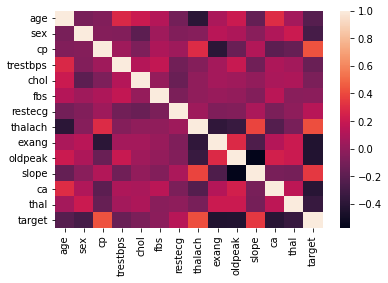

In [32]:
sns.heatmap(df_heart_corr)

#Machine Learning

In [33]:
from sklearn.linear_model import LinearRegression